In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
plt.rc('font',family="Malgun Gothic")
%matplotlib inline

In [8]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [18]:
df = pd.read_csv("소상공인시장진흥공단_상가업소정보_의료기관_201909.csv",low_memory=False)

In [19]:
df.shape

(91335, 39)

In [21]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344


In [22]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [36]:
drop_col= df.isnull().sum().sort_values(ascending=False).head(10).index

In [38]:
drop_col.tolist()

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시군구명']

In [42]:
df = df.drop(drop_col,axis=1)

KeyError: "['지점명' '동정보' '건물부번지' '호정보' '층정보' '건물명' '지번부번지' '표준산업분류코드' '표준산업분류명' '시군구명'] not found in axis"

In [47]:
df.columns

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '행정동코드', '행정동명',
       '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소', '도로명코드',
       '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도', '위도'],
      dtype='object')

In [48]:
df.shape

(91335, 29)

In [75]:
df_loc = df.loc[:,["상권업종중분류명","상권업종소분류명","경도","위도","상호명","시도명"]]

In [76]:
df_loc

,상권업종중분류명,상권업종소분류명,경도,위도,상호명,시도명
0,병원,산부인과,126.814295,37.336344,하나산부인과,경기도
1,병원,내과/외과,127.053198,37.488742,타워광명내과의원,서울특별시
2,병원,신경외과,126.734841,37.344955,조정현신경외과의원,경기도
3,병원,기타병원,129.115438,35.166872,한귀원정신과의원,부산광역시
4,약국/한약방,약국,127.095522,37.323528,더블유스토어수지점,경기도
...,...,...,...,...,...,...
91330,약국/한약방,약국,127.389865,36.352728,온누리약국,대전광역시
91331,의료관련서비스업,산후조리원,126.830144,37.627530,리원,경기도
91332,병원,노인/치매병원,129.082790,35.227138,참좋은요양병원,부산광역시
91333,병원,한의원,127.143958,37.540993,경희중앙한의원,서울특별시


In [77]:
df_loc["상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [78]:
df_loc["상권업종소분류명"].value_counts()

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: 상권업종소분류명, dtype: int64

In [79]:
df_grand = df_loc[df_loc["상권업종소분류명"] == "노인/치매병원"]

In [80]:
df_grand

,상권업종중분류명,상권업종소분류명,경도,위도,상호명,시도명
21,병원,노인/치매병원,129.040773,35.209154,다사랑요양병원,부산광역시
62,병원,노인/치매병원,127.746981,34.986585,노경회,전라남도
69,병원,노인/치매병원,126.780122,37.693689,일산카네이션너싱홈,경기도
79,병원,노인/치매병원,127.460606,34.991014,은성복지회,전라남도
107,병원,노인/치매병원,128.295524,36.365132,하은실버홈,경상북도
...,...,...,...,...,...,...
91184,병원,노인/치매병원,129.035645,35.343927,유성재단유성요양병원,경상남도
91216,병원,노인/치매병원,126.973450,35.946242,실로암요양병원매점,전라북도
91253,병원,노인/치매병원,126.907230,35.186972,한사랑요양병원,광주광역시
91328,병원,노인/치매병원,127.083401,36.768332,서울플러스,충청남도


In [81]:
df_grand.isnull().sum()

상권업종중분류명    0
상권업종소분류명    0
경도          0
위도          0
상호명         0
시도명         4
dtype: int64

In [82]:
import folium

In [88]:
df_grand_seoul = df_grand[df_grand["시도명"] == "서울특별시"]
map = folium.Map(location = [df_grand_seoul["위도"].mean(),df_grand_seoul["경도"].mean()],zoom_start = 12)
for n in df_grand_seoul.index:
    name = df_grand_seoul.loc[n,"상호명"]
    location = [df_grand_seoul.loc[n,"위도"],df_grand_seoul.loc[n,"경도"]]
    folium.Marker(
        location=location,
        popup = name,
    ).add_to(map)
map

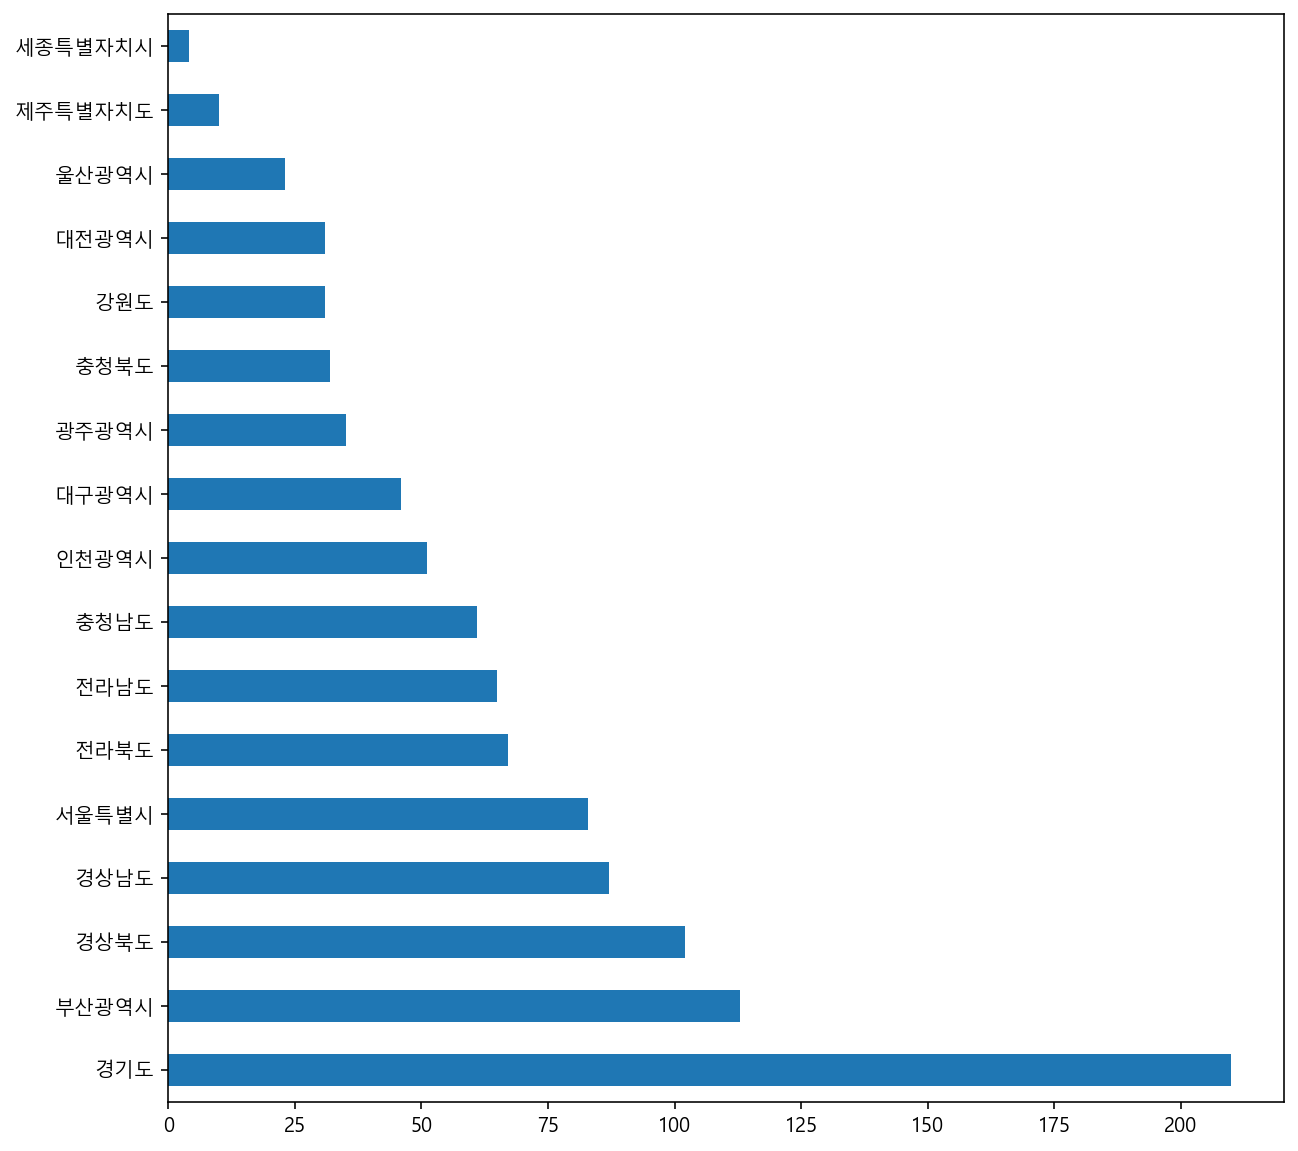

In [89]:
df_grand["시도명"].value_counts().plot.barh(figsize=(10,10))